In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

plt.style.use('dark_background')

import matplotlib
matplotlib.rc('figure', figsize=(10, 5))

In [206]:
def data(sample, direction, var, type_, angle):
    directory = f"{sample}/output/Angle_Dependence_4p2K_pos_{direction}/{var}/{type_}/"
    if angle < 0:
        prefix = "m"
    else:
        prefix = ""
    for file in os.listdir(directory):
        if file.startswith(f"{prefix}{int(np.abs(angle))}_"):
            return pd.read_csv(os.path.join(directory, file), names=["x", "y"])
    return None

In [207]:
def gaussian(x, a, mu, sigma2):
    return a * 1.0 / np.sqrt(2.0*np.pi*sigma2) * np.exp(-(x-mu)**2.0/(2.0*sigma2))

In [208]:
def weight(x,f):
    return -(f*x)**4-1

In [209]:
def fit_peak(data, mu0, var0, dx, f, N):
    # Initial guess
    # amplitude, mu, variance
    p0 = (data[data.x.between(mu0-dx, mu0+dx)].y.max(), mu0, var0)

    # Iterate to move middle of range towards the solution
    for i in range(N):
        subset = data[data.x.between(p0[1]-dx, p0[1]+dx)]
        pfit, _ = curve_fit(
            gaussian,
            xdata=subset.x,
            ydata=subset.y,
            sigma=weight(np.linspace(-1,1,num=len(subset.x)), f),
            p0=p0,
            bounds=([0,p0[1]-dx,0], [np.inf,p0[1]+dx,np.inf])
        )
        print(pfit)
        p0 = (p0[0], pfit[1], p0[2])
    
    return pfit

In [210]:
def fit_angle(sample, direction, var, angle, mu0, var0, dx=30, f=10, N=5):
    df = data(sample, direction, var, "fft", angle)

    fit=fit_peak(
        df,
        mu0,
        var0,
        dx,
        f,
        N
    )
    mu=fit[1]
    sigma=np.sqrt(fit[2])
    
    strength=gaussian(mu, fit[0], fit[1], fit[2])

    subset = df[df.x.between(mu0-dx, mu0+dx)]
    ax = subset.plot(x="x", y="y", label="data")
    ax.plot(subset.x, gaussian(subset.x, fit[0], fit[1], fit[2]), label="fit")
    print(f"Peak: {fit[1]} +- {sigma}. Strength: {strength}")

[1.66894113e+05 2.10733944e+02 1.09479681e+02]
[1.05364843e+05 2.08526001e+02 3.85733067e+01]
[1.04855449e+05 2.08606283e+02 3.83402617e+01]
[1.04599718e+05 2.08605029e+02 3.81412333e+01]
[1.04599718e+05 2.08605029e+02 3.81412333e+01]
Peak: 208.60502892102008 +- 6.1758589147165885. Strength: 6756.833413950869
[1.27668384e+05 2.03966355e+02 3.84232234e+01]
[1.10304770e+05 2.03419170e+02 2.92156805e+01]
[1.10833689e+05 2.03419431e+02 2.95217910e+01]
[1.10833689e+05 2.03419431e+02 2.95217910e+01]
[1.10833689e+05 2.03419431e+02 2.95217910e+01]
Peak: 203.41943106254115 +- 5.433395899390474. Strength: 8137.865438141977


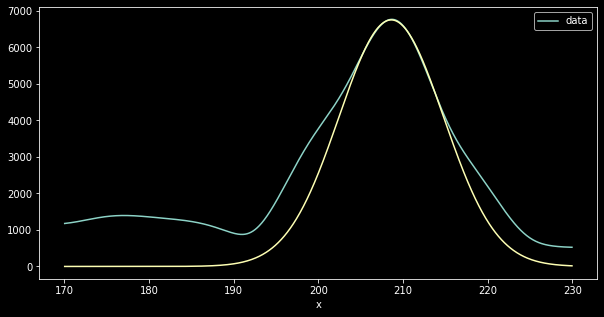

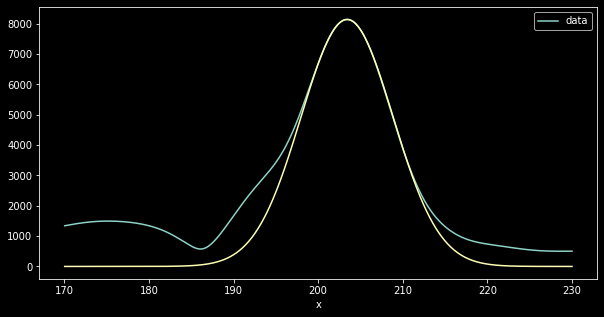

In [211]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=-10, mu0=200, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=-10, mu0=200, var0=5)

[6.04877062e+05 2.17242773e+02 4.52297743e+01]
[3.93312422e+05 2.14735899e+02 2.48081541e+01]
[3.90443000e+05 2.14756283e+02 2.44470394e+01]
[3.90443000e+05 2.14756283e+02 2.44470394e+01]
[3.90443000e+05 2.14756283e+02 2.44470394e+01]
Peak: 214.75628348518637 +- 4.944394740886902. Strength: 31503.192770183618
[4.04912111e+05 2.09165956e+02 2.61764266e+01]
[3.98035135e+05 2.09178654e+02 2.52208394e+01]
[3.98271092e+05 2.09178713e+02 2.52535509e+01]
[3.98271092e+05 2.09178713e+02 2.52535509e+01]
[3.98271092e+05 2.09178713e+02 2.52535509e+01]
Peak: 209.17871339635417 +- 5.025291128651682. Strength: 31617.507079053037


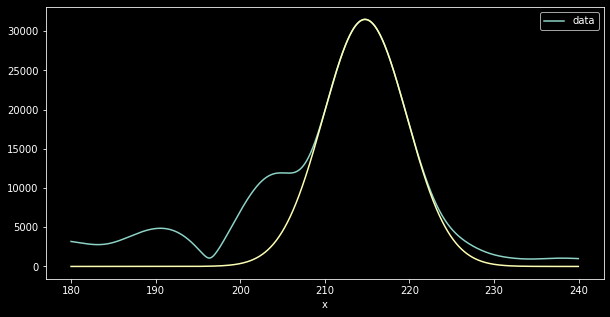

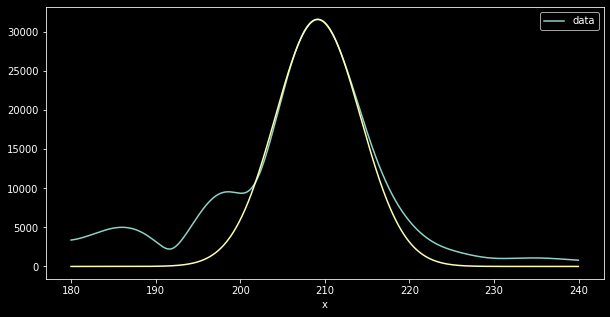

In [212]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=-5, mu0=210, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=-5, mu0=210, var0=5)

[5.33572106e+05 2.14318212e+02 2.50848713e+01]
[5.34689415e+05 2.14318412e+02 2.52020429e+01]
[5.34689415e+05 2.14318412e+02 2.52020429e+01]
[5.34689415e+05 2.14318412e+02 2.52020429e+01]
[5.34689415e+05 2.14318412e+02 2.52020429e+01]
Peak: 214.31841156077996 +- 5.020163637136826. Strength: 42490.689566021276
[8.33052085e+05 2.06773317e+02 4.36848370e+01]
[5.59858865e+05 2.08731574e+02 2.43793870e+01]
[5.76774319e+05 2.08771787e+02 2.59783441e+01]
[5.76774319e+05 2.08771787e+02 2.59783442e+01]
[5.76774319e+05 2.08771787e+02 2.59783442e+01]
Peak: 208.77178653444346 +- 5.096895540978933. Strength: 45145.061374725025


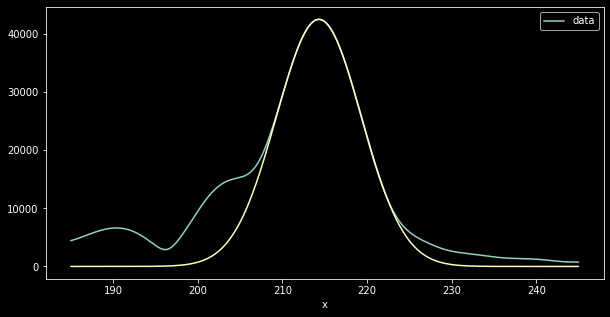

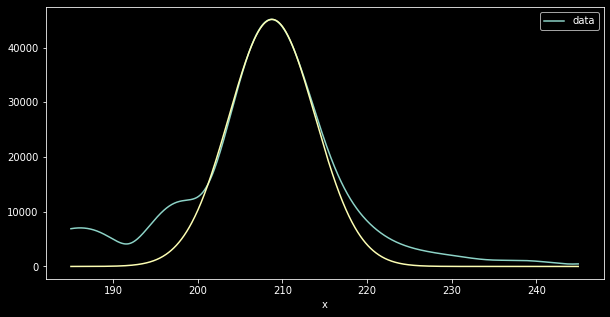

In [213]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=0, mu0=215, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=0, mu0=215, var0=5)

[1.26182815e+05 2.10928189e+02 2.19522511e+01]
[1.48622657e+05 2.10347587e+02 2.96280675e+01]
[1.51693178e+05 2.10337723e+02 3.09656590e+01]
[1.51693178e+05 2.10337723e+02 3.09656590e+01]
[1.51693178e+05 2.10337723e+02 3.09656590e+01]
Peak: 210.33772343977267 +- 5.56467959769059. Strength: 10875.16744325433
[1.47528005e+05 2.03996946e+02 2.24265724e+01]
[1.39787926e+05 2.04305101e+02 2.82441356e+01]
[1.38866758e+05 2.04303053e+02 2.78407969e+01]
[1.38866758e+05 2.04303053e+02 2.78407969e+01]
[1.38866758e+05 2.04303053e+02 2.78407969e+01]
Peak: 204.30305298734467 +- 5.276437903187226. Strength: 10499.473695013769


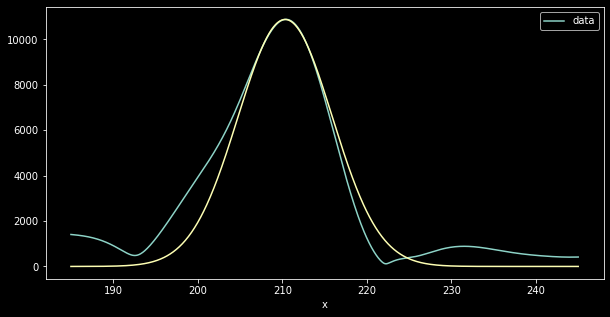

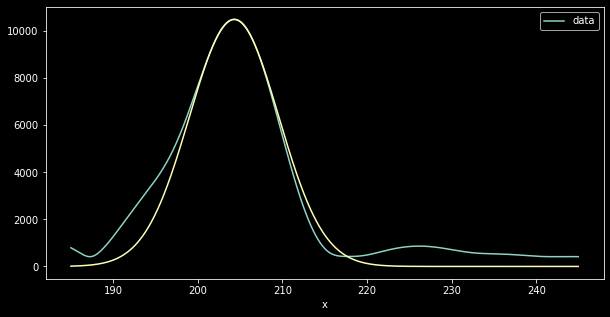

In [214]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=5, mu0=215, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=5, mu0=215, var0=5)

[2.62864792e+05 2.13651908e+02 3.05312855e+01]
[2.68661564e+05 2.13621457e+02 3.19732149e+01]
[2.68774083e+05 2.13621420e+02 3.20020407e+01]
[2.68774083e+05 2.13621420e+02 3.20020407e+01]
[2.68774083e+05 2.13621420e+02 3.20020407e+01]
Peak: 213.6214199137355 +- 5.657034617897886. Strength: 18954.33787267157
[2.75311926e+05 2.08036882e+02 3.33787246e+01]
[2.53194436e+05 2.08493204e+02 2.99751064e+01]
[2.53637802e+05 2.08494743e+02 3.00889459e+01]
[2.53637802e+05 2.08494743e+02 3.00889459e+01]
[2.53637802e+05 2.08494743e+02 3.00889459e+01]
Peak: 208.4947430090816 +- 5.485339177278394. Strength: 18446.77964910398


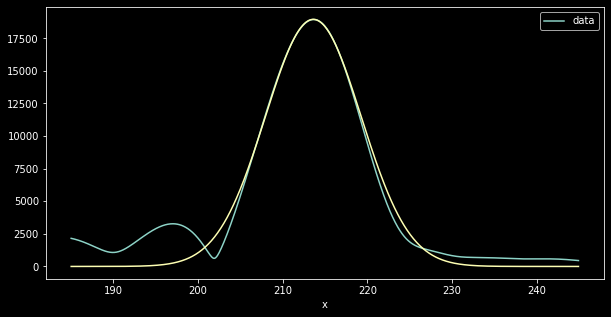

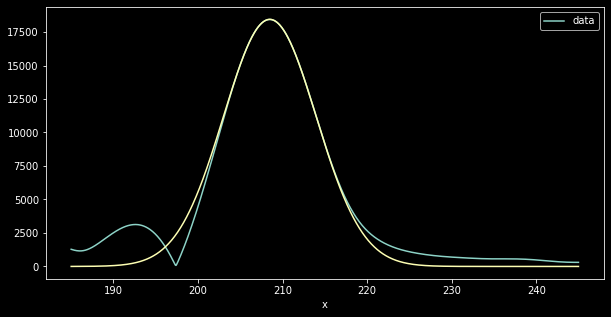

In [215]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=10, mu0=215, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=10, mu0=215, var0=5)

[1.30757257e+05 2.21915135e+02 3.03590482e+01]
[1.59578533e+05 2.23096080e+02 3.87374427e+01]
[1.59602656e+05 2.23095635e+02 3.87518495e+01]
[1.59602656e+05 2.23095635e+02 3.87518495e+01]
[1.59602656e+05 2.23095635e+02 3.87518495e+01]
Peak: 223.0956349804502 +- 6.225098353606035. Strength: 10228.311906189032
[1.50240598e+05 2.17817765e+02 3.38722336e+01]
[1.60453132e+05 2.17992103e+02 3.86581820e+01]
[1.61031882e+05 2.17992792e+02 3.89559044e+01]
[1.61031882e+05 2.17992792e+02 3.89559045e+01]
[1.61031882e+05 2.17992792e+02 3.89559044e+01]
Peak: 217.99279220705773 +- 6.241466527958747. Strength: 10292.841565675364


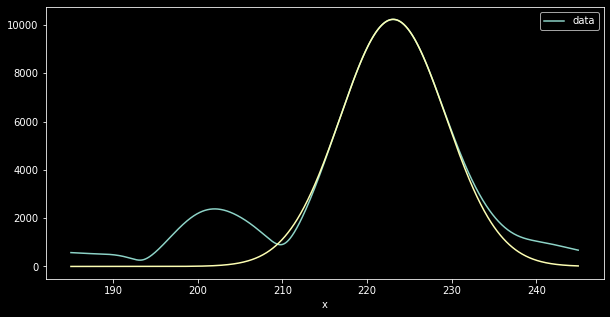

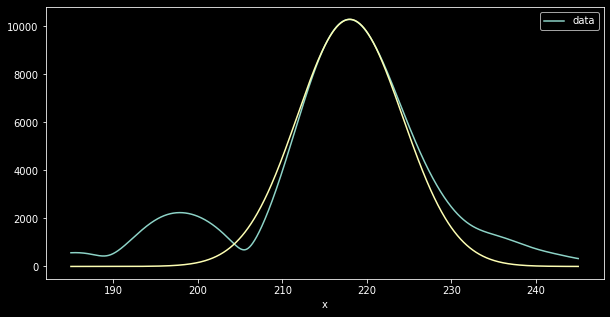

In [216]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=20, mu0=215, var0=5)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=20, mu0=215, var0=5)

[49701.94239616   235.45790327   107.78286061]
[49642.55235271   235.46076115   107.36205689]
[49637.72445463   235.46104389   107.32774624]
[49637.72446305   235.46104389   107.32774628]
[49637.72445347   235.46104389   107.32774623]
Peak: 235.4610438917207 +- 10.359910531874096. Strength: 1911.4631276476994
[47208.12866908   230.85260687   114.81872928]
[47053.10117588   230.86685002   113.60373131]
[47050.43760357   230.86723038   113.58156736]
[47050.43760382   230.86723038   113.58156737]
[47050.43760054   230.86723038   113.58156734]
Peak: 230.8672303843613 +- 10.65746533378792. Strength: 1761.245125587028


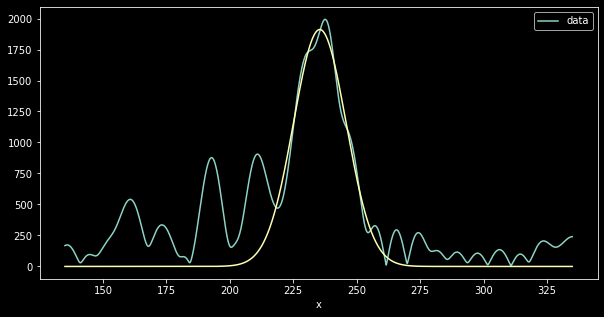

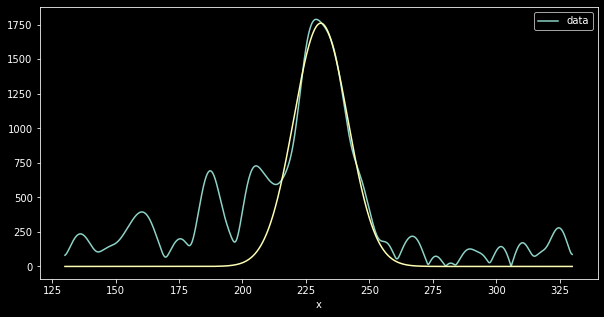

In [217]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=30, mu0=235, var0=5, f=5, dx=100)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=30, mu0=230, var0=5, f=5, dx=100)

[39570.94538      230.10322749  1217.45832563]
[40632.69270192   229.81267204  1310.76582332]
[40708.89097418   229.79744099  1317.66569695]
[40708.89091847   229.79744103  1317.66569086]
[40708.89092746   229.79744103  1317.66569182]
Peak: 229.79744102716944 +- 36.299665174982216. Strength: 447.4007597846014
[45226.27540057   223.20280667  1468.13847846]
[46952.93666384   222.77237848  1624.09948308]
[47073.54427223   222.7527006   1635.38619987]
[47081.86495036   222.75296524  1636.14983454]
[47081.86496044   222.75296523  1636.14983581]
Peak: 222.7529652323435 +- 40.44934901591898. Strength: 464.3572030164707


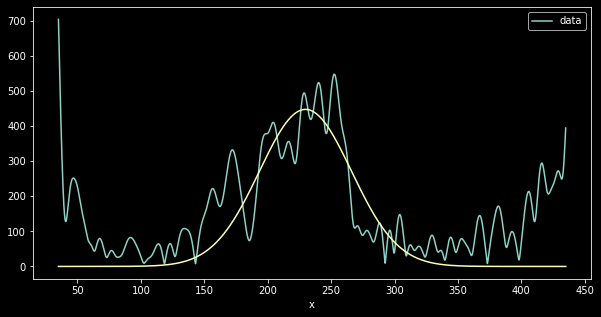

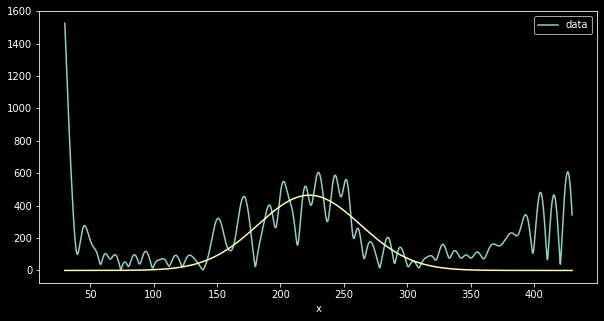

In [218]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=40, mu0=235, var0=30, f=3, dx=200)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=40, mu0=230, var0=30, f=3, dx=200)

[16153.88592585   247.85836427  1980.70510176]
[12820.43062558   250.2255951   1011.21161589]
[12272.87895736   250.97368254   876.68705492]
[12110.26453787   251.20531679   838.49984589]
[12070.37793117   251.26266543   829.2607947 ]
Peak: 251.26266543333483 +- 28.796888628871002. Strength: 167.2189019872456
[17497.74951452   240.90832484  2723.81770902]
[15094.42997028   241.71793068  1872.2408071 ]
[14944.57504279   241.8748208   1823.00814224]
[14919.88984396   241.90041905  1814.99866608]
[14913.13374382   241.90932463  1812.74505928]
Peak: 241.90932463128996 +- 42.57634389287484. Strength: 139.7367420429959


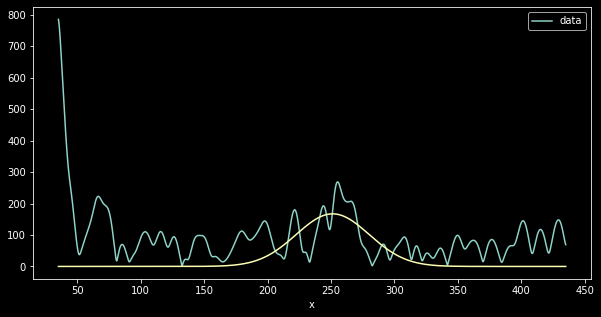

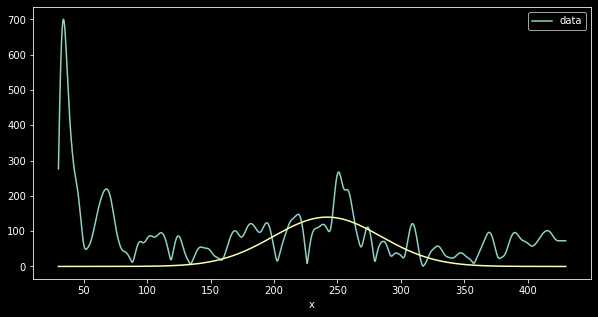

In [219]:
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=50, mu0=235, var0=30, f=3, dx=200)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=50, mu0=230, var0=30, f=3, dx=200)

[15887.70756794   250.38923213 19779.48850972]
[16019.30955035   246.08040222 20034.08373564]
[16171.87508996   247.3780832  20448.72385266]
[16133.96272933   246.97171837 20343.55778073]
[16147.69647635   247.10644632 20381.38227766]
Peak: 247.1064463169552 +- 142.76337862933028. Strength: 45.12360885091707
[41374.55043081   430.         52765.8186579 ]
[8772.61222414  417.37943211 2919.75964877]
[6244.65304015  418.19748808 1262.24116879]
[6274.25434739  418.30490296 1276.30356822]
[6280.28277087  418.31861516 1279.43870542]
Peak: 418.318615156083 +- 35.76924244963656. Strength: 70.04538420698518


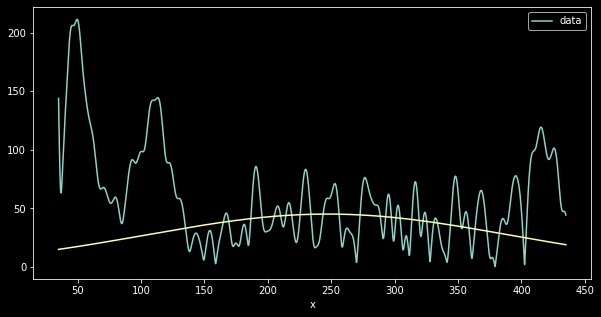

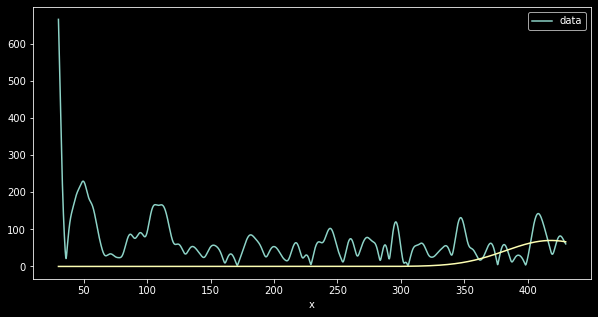

In [223]:
# This is garbage
fit_angle("Zr3_5584_nb_sc", "up", "Rxx68", angle=60, mu0=235, var0=100, f=3, dx=200)
fit_angle("Zr3_5584_nb_sc", "down", "Rxx68", angle=60, mu0=230, var0=100, f=4, dx=200)